<a href="https://colab.research.google.com/github/shiabc/machine-learning-models-practice/blob/main/Regression_Houseprice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
df = pd.read_csv('/content/drive/MyDrive/Project_github/Regression/Housing1.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [33]:
print(f"the housing shape is:{df.shape}")
print("")
print(df.columns)

the housing shape is:(545, 13)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


In [34]:
table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isnull().sum(),
    'NullPercent':df.isnull().sum() / len(df),
    'Types':df.dtypes.values
})
table

,Unique,Null,NullPercent,Types
price,219,0,0.0,int64
area,284,0,0.0,int64
bedrooms,6,0,0.0,int64
bathrooms,4,0,0.0,int64
stories,4,0,0.0,int64
mainroad,2,0,0.0,object
guestroom,2,0,0.0,object
basement,2,0,0.0,object
hotwaterheating,2,0,0.0,object
airconditioning,2,0,0.0,object


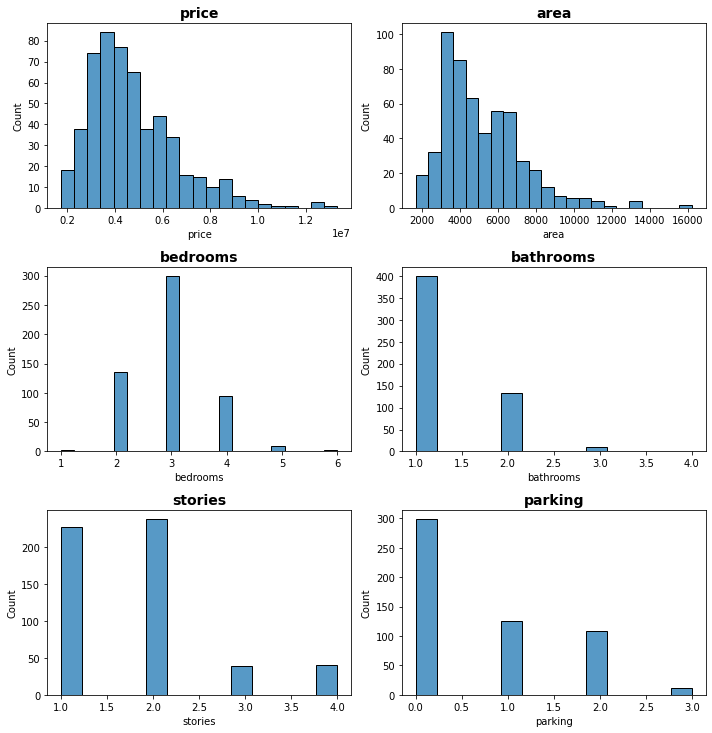

In [35]:
plt.figure(figsize=(10,20))
for i,num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6,2, i + 1)
    sns.histplot(x=df[num])
    plt.title(num, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

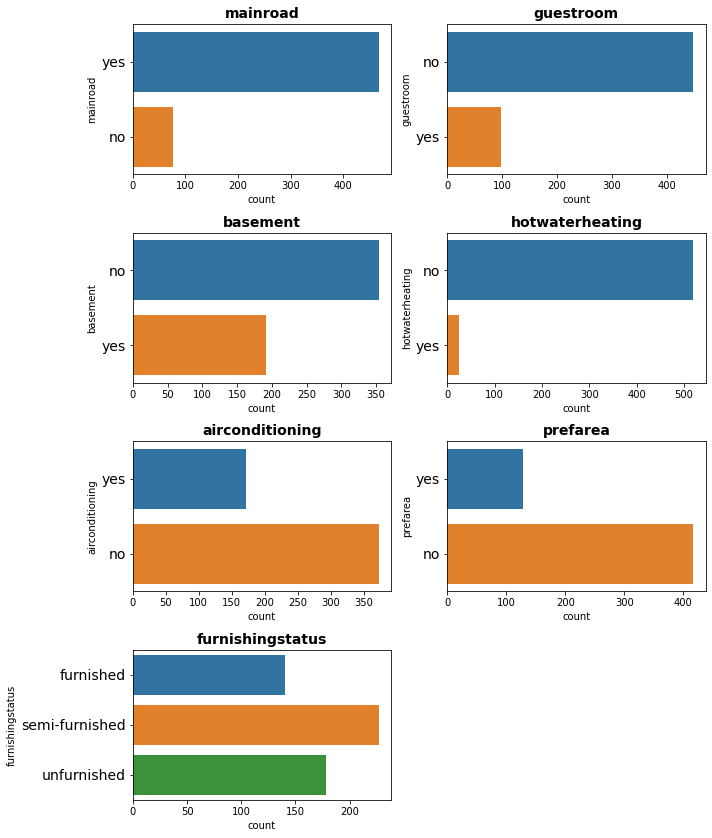

In [36]:
plt.figure(figsize=(10,20))
for i,cat in enumerate(df.select_dtypes(include='O')):
    ax = plt.subplot(7,2, i + 1)
    sns.countplot(y=df[cat])
    plt.title(cat, fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14)
plt.tight_layout()
plt.show()


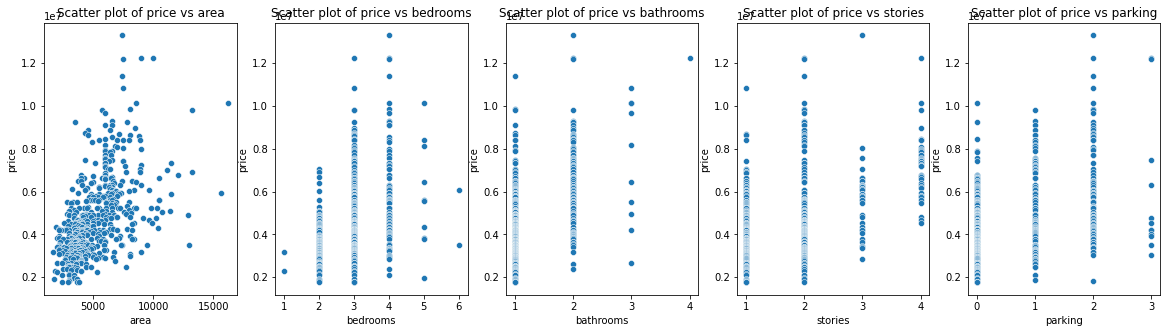

In [38]:
num_vars = ["area", "bedrooms", "bathrooms", "stories", "parking"]
fig, axs = plt.subplots(ncols=len(num_vars), figsize=(20, 5))
for i, var in enumerate(num_vars):
    sns.scatterplot(x=var, y="price", data=df, ax=axs[i])
    axs[i].set(title=f"Scatter plot of price vs {var}")
plt.show()

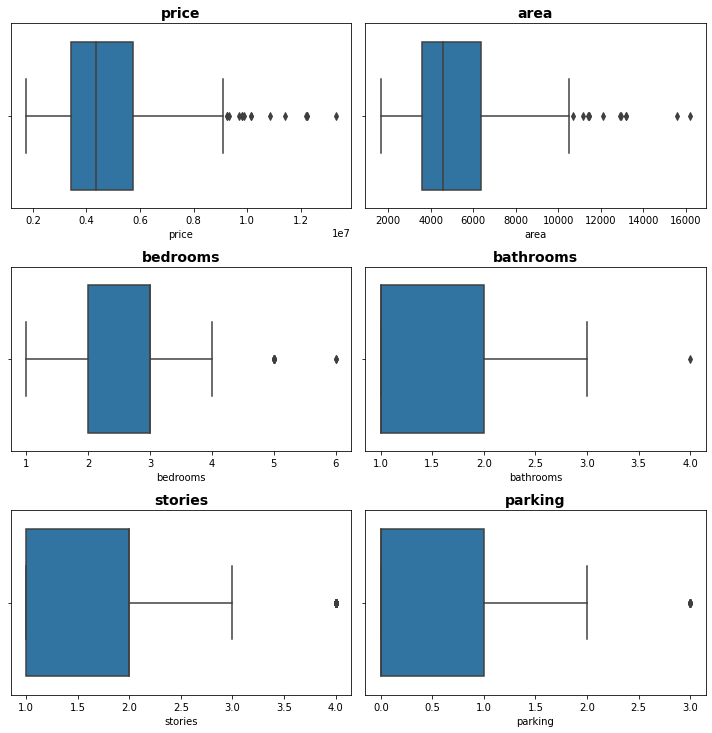

In [ ]:
#เช็ค outlier
plt.figure(figsize=(10,20))
for i,num in enumerate(df.select_dtypes(exclude='O')):
    ax = plt.subplot(6,2, i + 1)
    sns.boxplot(x=df[num])
    plt.title(num, fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [39]:
# เคลียร์ outlier
outlier_cols = ['price', 'area']
Q1 = df[outlier_cols].quantile(0.25)
Q3 = df[outlier_cols].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df[outlier_cols] < lower_bound) | (df[outlier_cols] > upper_bound)).any(axis=1)]

In [74]:
#เปลี่ยน Binary Variable เป็น yes:1 No:0
binary_vars = ["mainroad", "guestroom", "basement", "hotwaterheating", "airconditioning", "prefarea"]
for var in binary_vars:
    df[var] = df[var].map({"yes": 1, "no": 0})

In [76]:
#check multi corr
corr_matrix = df.corr()
corr_matrix

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
price,1.000000,0.532442,0.333710,0.468149,0.441913,0.308367,0.300780,0.190709,0.074745,0.471205,0.322168,0.282393
area,0.532442,1.000000,0.125176,0.181311,0.097229,0.301047,0.199572,0.040468,-0.023654,0.257596,0.354536,0.206469
bedrooms,0.333710,0.125176,1.000000,0.349242,0.407332,-0.025478,0.077898,0.101589,0.042696,0.149406,0.105315,0.060678
bathrooms,0.468149,0.181311,0.349242,1.000000,0.308117,0.026569,0.148831,0.126454,0.045185,0.177463,0.128444,0.032311
stories,0.441913,0.097229,0.407332,0.308117,1.000000,0.119209,0.035652,-0.166759,0.028432,0.290693,0.020732,0.018738
mainroad,0.308367,0.301047,-0.025478,0.026569,0.119209,1.000000,0.093972,0.041584,-0.019967,0.101972,0.196432,0.193420
guestroom,0.300780,0.199572,0.077898,0.148831,0.035652,0.093972,1.000000,0.372379,-0.022340,0.138585,0.039985,0.183386
basement,0.190709,0.040468,0.101589,0.126454,-0.166759,0.041584,0.372379,1.000000,-0.012358,0.040423,0.038288,0.234104
hotwaterheating,0.074745,-0.023654,0.042696,0.045185,0.028432,-0.019967,-0.022340,-0.012358,1.000000,-0.119422,0.051979,-0.041252
airconditioning,0.471205,0.257596,0.149406,0.177463,0.290693,0.101972,0.138585,0.040423,-0.119422,1.000000,0.129267,0.093260


In [41]:
df_clean = df.copy()

In [43]:
#สร้างตัวแปร Dummy
cat_cols = ['furnishingstatus']
for col in cat_cols:
    dummies = pd.get_dummies(df_clean[col],prefix=col)
    df_clean = pd.concat([df_clean, dummies], axis=1)
    df_clean.drop(col,axis=1,inplace=True)


In [92]:
df_clean

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,0.491525,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,0,1,0
16,9100000,0.559322,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,0,1
17,8960000,0.774011,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
18,8890000,0.333333,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,1,0,0
19,8855000,0.538983,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.152542,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0,1
541,1767150,0.084746,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0,0,1,0
542,1750000,0.222599,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,0,1
543,1750000,0.142373,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0,1,0,0


In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score




In [84]:
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
# Scale the data
scaler = MinMaxScaler()
df_clean[num_vars] = scaler.fit_transform(df[num_vars])


In [85]:
df_clean

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
15,9100000,0.491525,0.6,0.0,0.333333,1,0,1,0,0,0.666667,0,0,1,0
16,9100000,0.559322,0.6,0.5,0.333333,1,1,1,0,1,0.333333,1,0,0,1
17,8960000,0.774011,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0,0
18,8890000,0.333333,0.4,0.5,0.333333,1,1,0,0,1,0.666667,0,1,0,0
19,8855000,0.538983,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,0.152542,0.2,0.0,0.000000,1,0,1,0,0,0.666667,0,0,0,1
541,1767150,0.084746,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0,0,1,0
542,1750000,0.222599,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,0,1
543,1750000,0.142373,0.4,0.0,0.000000,0,0,0,0,0,0.000000,0,1,0,0


In [86]:
# Split the data into training and testing sets
X = df_clean.drop('price', axis=1)
y = df_clean['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Fit a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Calculate R-squared value on testing set
y_pred = lr.predict(X_test)
r_squared = r2_score(y_test, y_pred)
print("R-squared value:", r_squared)

R-squared value: 0.6653980702346334


In [87]:
coeff = pd.DataFrame(lr.coef_, X.columns, columns=['Coeff'])
coeff


,Coeff
area,2.101437e+06
bedrooms,3.231491e+05
bathrooms,1.437773e+06
stories,1.271218e+06
mainroad,4.195655e+05
guestroom,3.510614e+05
basement,2.292925e+05
hotwaterheating,8.213703e+05
airconditioning,8.544719e+05
parking,5.251199e+05
